In [ ]:
import pandas as pd
from sklearn import datasets
import numpy as np
from sklearn import tree
from sklearn import model_selection
from sklearn import metrics
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
import graphviz
import math
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
%matplotlib inline

### Problem 1

In [ ]:
iris = datasets.load_iris()

In [ ]:
iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [ ]:
iris.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
x = iris.loc[:,'sepal length (cm)':'petal width (cm)']
y = iris.target
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,
                                                                    y,
                                                                    test_size=0.2)

In [ ]:
clf_1 = tree.DecisionTreeClassifier(max_depth=1, min_samples_leaf=2, min_samples_split=5)
clf_1 = clf_1.fit(x_train, y_train)

In [ ]:
expected = y_test
predicted = clf_1.predict(x_test)

In [ ]:
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         6
         1.0       0.46      1.00      0.63        11
         2.0       0.00      0.00      0.00        13

    accuracy                           0.57        30
   macro avg       0.49      0.67      0.54        30
weighted avg       0.37      0.57      0.43        30



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


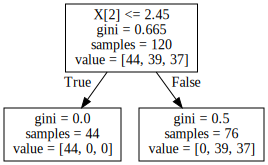

In [ ]:
graphviz.Source(tree.export_graphviz(clf_1))

In [ ]:
clf_2 = tree.DecisionTreeClassifier(max_depth=2, min_samples_leaf=2, min_samples_split=5)
clf_2 = clf_2.fit(x_train, y_train)

In [ ]:
expected = y_test
predicted = clf_2.predict(x_test)

In [ ]:
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         6
         1.0       0.92      1.00      0.96        11
         2.0       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
clf_3 = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=5)
clf_3 = clf_3.fit(x_train, y_train)

In [ ]:
expected = y_test
predicted = clf_3.predict(x_test)

In [ ]:
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         6
         1.0       0.92      1.00      0.96        11
         2.0       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
clf_4 = tree.DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=5)
clf_4 = clf_4.fit(x_train, y_train)

In [ ]:
expected = y_test
predicted = clf_4.predict(x_test)

In [ ]:
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         6
         1.0       0.92      1.00      0.96        11
         2.0       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
clf_5 = tree.DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=5)
clf_5 = clf_5.fit(x_train, y_train)

In [ ]:
expected = y_test
predicted = clf_5.predict(x_test)

In [ ]:
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         6
         1.0       0.92      1.00      0.96        11
         2.0       1.00      0.92      0.96        13

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



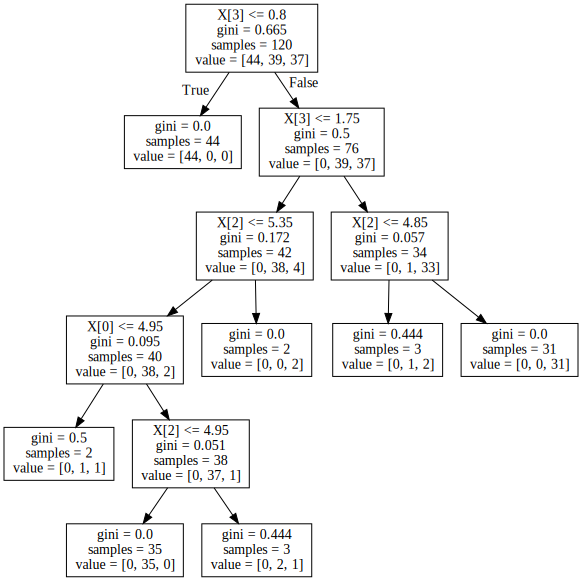

In [ ]:
graphviz.Source(tree.export_graphviz(clf_5))

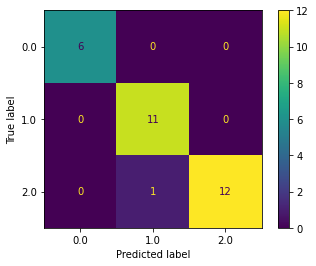

In [ ]:
cm = confusion_matrix(expected, predicted, labels=clf_5.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_5.classes_)
disp.plot() 

*Which depth values result in the highest Recall? Why? Which value resulted in the lowest Precision? Why? Which value results in the best F1 score? Explain the difference between the micro/macro/weighted methods of score calculation.*

Depth 1 resulted in the lowest **recall**, and depths 2-5 in the highest recall, because the deeper the decision tree, the more complex the tree, the better the results and hence recall. 

Depth 1 resulted in the lowest **precision**, because splitting the data on only one feature is not enough. If we look at the decision tree for depth 1, it was able to have gini = 0 for one child, but the other has a very high value for gini - impure. 

Depth 1 resulted in the lowest **F1-score**, and depths 2-5 in the highest, because the decision tree with depth 1 is the one that had the worst recall and prrecision, while decision trees with depth 2-5 have equal precision and recall scores, hence F1-score is equal for decision trees with depths 2-5.

**Macro average** is an arithmetic average of the scores. **Weighted average** weights the score of each class by the number of samples from that class. For **micro average**, we simply look at all the samples together without splitting then by class. We calculate micro-precision and micro-recall first, then use them in the F1 formula. In the calculation of micro-precision and micro-recall we use the sum of TP and TN for all classes together. When using micro average, micro-F1 = micro-precision = micro-recall = accuracy.

Resources: https://towardsdatascience.com/multi-class-metrics-made-simple-part-ii-the-f1-score-ebe8b2c2ca1


### Problem 2

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
# load dataset into Pandas DataFrame
breast_cancer = pd.read_csv(url, names=['Sample code number','Clump Thickness',
                               'Uniformity of Cell Size','Uniformity of Cell Shape',
                               'Marginal Adhesion', 'Single Epithelial Cell Size',
                               'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli',
                               'Mitoses', 'Class'])


In [ ]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [ ]:
breast_cancer['Bare Nuclei'] = breast_cancer['Bare Nuclei'].apply(pd.to_numeric, errors='coerce')

In [ ]:
breast_cancer = breast_cancer.dropna()

In [ ]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sample code number           683 non-null    int64  
 1   Clump Thickness              683 non-null    int64  
 2   Uniformity of Cell Size      683 non-null    int64  
 3   Uniformity of Cell Shape     683 non-null    int64  
 4   Marginal Adhesion            683 non-null    int64  
 5   Single Epithelial Cell Size  683 non-null    int64  
 6   Bare Nuclei                  683 non-null    float64
 7   Bland Chromatin              683 non-null    int64  
 8   Normal Nucleoli              683 non-null    int64  
 9   Mitoses                      683 non-null    int64  
 10  Class                        683 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 64.0 KB


In [ ]:
breast_cancer.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [ ]:
x = breast_cancer.loc[:,'Clump Thickness':'Mitoses']
y = breast_cancer.Class
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,
                                                                    y,
                                                                    test_size=0.2)
clf = tree.DecisionTreeClassifier(max_depth=2, min_samples_leaf=2, min_samples_split=5)
clf = clf.fit(x_train, y_train)

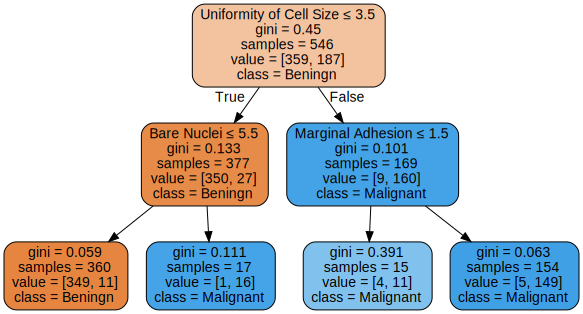

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=['Clump Thickness',
                               'Uniformity of Cell Size','Uniformity of Cell Shape',
                               'Marginal Adhesion', 'Single Epithelial Cell Size',
                               'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli',
                               'Mitoses'],  
                      class_names=['Beningn', 'Malignant'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [ ]:
samples_true = clf.tree_.n_node_samples[1]
samples_false = clf.tree_.n_node_samples[4]
samples_total = clf.tree_.n_node_samples[0]
print(samples_true, " ", samples_false," ", samples_total)

377   169   546


In [ ]:
true_b = clf.tree_.value[1][0][0]
true_m = clf.tree_.value[1][0][1]
print(true_b, " ", true_m)

350.0   27.0


In [ ]:
false_b = clf.tree_.value[4][0][0]
false_m = clf.tree_.value[4][0][1]
print(false_b, " ", false_m)

9.0   160.0


In [ ]:
initial_b = clf.tree_.value[0][0][0]
initial_m = clf.tree_.value[0][0][1]
print(initial_b, " ", initial_m)

359.0   187.0


In [ ]:
error_true = 1 - max((true_b/samples_true), (true_m/samples_true)) #misclassification error
error_false = 1 - max((false_b/samples_false), (false_m/samples_false))

In [ ]:
error = (samples_true/samples_total)*error_true+(samples_false/samples_total)*error_false
print("Misclassificassion error: ", error)

Misclassificassion error:  0.06593406593406592


In [ ]:
gini_true = (1-(true_b/samples_true)**2-(true_m/samples_true)**2)
gini_false = (1-(false_b/samples_false)**2-(false_m/samples_false)**2)

In [ ]:
gini_index = (samples_true/samples_total)*gini_true+(samples_false/samples_total)*gini_false
print("The gini index: ", gini_index)

The gini index:  0.12302938848541785


In [ ]:
entropy_true = -(true_b/samples_true)*math.log2((true_b/samples_true)) - (true_m/samples_true)*math.log2((true_m/samples_true))
entropy_false = -(false_b/samples_false)*math.log2((false_b/samples_false))-(false_m/samples_false)*math.log2((false_m/samples_false))
entropy = (samples_true/samples_total)*entropy_true+(samples_false/samples_total)*entropy_false
print("Entropy for the first split:", entropy)

Entropy for the first split: 0.34968784201334807


In [ ]:
initial_entropy = -(initial_b/samples_total)*math.log2((initial_b/samples_total)) - (initial_m/samples_total)*math.log2((initial_m/samples_total)) #initial entropy
print("Initial Entropy: ",initial_entropy)

Initial Entropy:  0.9271823494519706


In [ ]:
information_gain = initial_entropy - entropy
print("Information gain: ", information_gain)

Information gain:  0.5774945074386226


What is the feature selected for the first split, and what value determines the decision boundary?

'Uniformity of Cell Size' was selected for the first split and the decision boundary is 3.5.

### Problem 3

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
# load dataset into Pandas DataFrame
breast_cancer = pd.read_csv(url, names=['ID number','Diagnosis',
                                        'radius_mean', 'texture_mean',
                                        'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 
                                        'concavity_mean', 'concave points_mean','symmetry_mean', 'fractal dimension_mean',
                                        'radius_se', 'texture_se',
                                        'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 
                                        'concavity_se', 'concave points_se','symmetry_se', 'fractal dimension_se',
                                        'radius_worst', 'texture_worst',
                                        'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 
                                        'concavity_worst', 'concave points_worst','symmetry_worst', 'fractal dimension_worst'])

In [ ]:
breast_cancer.head()

,ID number,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID number                569 non-null    int64  
 1   Diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
columns = ['radius_mean', 'texture_mean',
          'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 
          'concavity_mean', 'concave points_mean','symmetry_mean', 'fractal dimension_mean',
          'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 
          'concavity_se', 'concave points_se','symmetry_se', 'fractal dimension_se',
          'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 
          'concavity_worst', 'concave points_worst','symmetry_worst', 'fractal dimension_worst']
# Separating out the columns
x = breast_cancer.loc[:, columns].values
# Separating out the target
y = breast_cancer.loc[:,['Diagnosis']].values
# Standardizing the columns
x = StandardScaler().fit_transform(x)

In [1]:
pca = PCA(n_components=3) # Reducing the number of components to three.
principal_components = pca.fit_transform(x) #perform PCA
principal_df = pd.DataFrame(data = principal_components
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
final_pca = pd.concat([principal_df, breast_cancer[['Diagnosis']]], axis = 1)

NameError: ignored

In [ ]:
print("Percentage of variance explained by each component")
print(np.round(pca.explained_variance_ratio_, decimals=4)*100)

Percentage of variance explained by each component
[44.27 18.97  9.39]


In [ ]:
final_pca.head()

,principal component 1,principal component 2,principal component 3,Diagnosis
0,9.192837,1.948583,-1.123161,M
1,2.387802,-3.768172,-0.529288,M
2,5.733896,-1.075174,-0.551748,M
3,7.122953,10.275589,-3.232787,M
4,3.935302,-1.948072,1.389772,M


Using original continuous data to contruct a decision tree, compute precision, recall, F1-score, confusion matrix, FP, TP, FPR, TPR.

In [ ]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,
                                                                    y,
                                                                    test_size=0.2)
clf_original = tree.DecisionTreeClassifier(max_depth=2, min_samples_leaf=2, min_samples_split=5)
clf_original = clf_original.fit(x_train, y_train)

In [ ]:
expected = y_test
predicted = clf_original.predict(x_test)
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           B       0.93      0.96      0.94        69
           M       0.93      0.89      0.91        45

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114



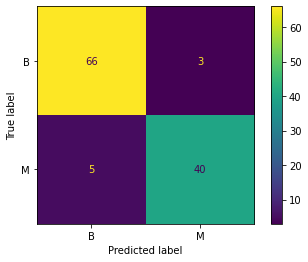

In [ ]:
cm_original = confusion_matrix(expected, predicted, labels=['B', 'M'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_original,
                              display_labels=['B', 'M'])
disp.plot() 

In [ ]:
print("FP = ", cm_original[0][1])
print("TP = ", cm_original[1][1])
print("FPR = ", cm_original[0][1]/(cm_original[0][1] + cm_original[0][0]))
print("TPR = ", cm_original[1][1]/(cm_original[1][1] + cm_original[1][0]))

FP =  3
TP =  40
FPR =  0.043478260869565216
TPR =  0.8888888888888888


Using principal component 1 to contruct a decision tree, compute precision, recall, F1-score, confusion matrix, FP, TP, FPR, TPR.

In [ ]:
x_pca = final_pca['principal component 1']
x_pca = x_pca.to_numpy().reshape(-1,1)
x_pca_train, x_pca_test, y_train, y_test = model_selection.train_test_split(x_pca,
                                                                    y,
                                                                    test_size=0.2)
clf_pca = tree.DecisionTreeClassifier(max_depth=2, min_samples_leaf=2, min_samples_split=5)
clf_pca = clf_pca.fit(x_pca_train, y_train)

In [ ]:
expected = y_test
predicted = clf_pca.predict(x_pca_test)
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           B       0.90      0.99      0.94        72
           M       0.97      0.81      0.88        42

    accuracy                           0.92       114
   macro avg       0.94      0.90      0.91       114
weighted avg       0.93      0.92      0.92       114



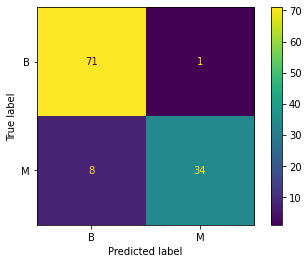

In [ ]:
cm_pca = confusion_matrix(expected, predicted, labels=clf_pca.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_pca,
                              display_labels=clf_pca.classes_)
disp.plot() 

In [ ]:
print("FP = ", cm_pca[0][1])
print("TP = ", cm_pca[1][1])
print("FPR = ", cm_pca[0][1]/(cm_pca[0][1] + cm_pca[0][0]))
print("TPR = ", cm_pca[1][1]/(cm_pca[1][1] + cm_pca[1][0]))

FP =  1
TP =  34
FPR =  0.013888888888888888
TPR =  0.8095238095238095


Using principal component 1 and 2 to contruct a decision tree, compute precision, recall, F1-score, confusion matrix, FP, TP, FPR, TPR.

In [ ]:
x_pca_2 = final_pca.loc[:, ['principal component 1', 'principal component 2']]
x_pca_2_train, x_pca_2_test, y_train, y_test = model_selection.train_test_split(x_pca_2,
                                                                    y,
                                                                    test_size=0.2)
clf_pca_2 = tree.DecisionTreeClassifier(max_depth=2, min_samples_leaf=2, min_samples_split=5)
clf_pca_2 = clf_pca_2.fit(x_pca_2_train, y_train)

In [ ]:
expected = y_test
predicted = clf_pca_2.predict(x_pca_2_test)
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           B       0.89      0.97      0.93        72
           M       0.94      0.79      0.86        42

    accuracy                           0.90       114
   macro avg       0.91      0.88      0.89       114
weighted avg       0.91      0.90      0.90       114



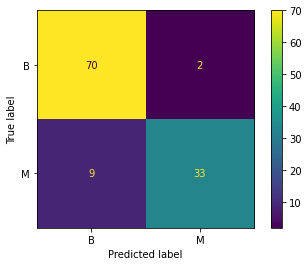

In [ ]:
cm_pca_2 = confusion_matrix(expected, predicted, labels=clf_pca_2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_pca_2,
                              display_labels=clf_pca_2.classes_)
disp.plot() 

In [ ]:
cm_pca_2

array([[70,  2],
       [ 9, 33]])

In [ ]:
print("FP = ", cm_pca_2[0][1])
print("TP = ", cm_pca_2[1][1])
print("FPR = ", cm_pca_2[0][1]/(cm_pca_2[0][1] + cm_pca_2[0][0]))
print("TPR = ", cm_pca_2[1][1]/(cm_pca_2[1][1] + cm_pca_2[1][0]))

FP =  2
TP =  33
FPR =  0.027777777777777776
TPR =  0.7857142857142857


*Is using continuous data in this case beneficial within the model? How?*

Probability for false alarm is:
- 0.043 for continuous data
- 0.014 for pc1
- 0.028 for pc1 and pc2

Also, probability of detection is:
- 0.889 for continuous data
- 0.810 for pc1
- 0.786 for pc1 and pc2

In this case, probability of detection is more important than probability of false alarm, since a missing a patient with cancer is more costly than misdiagnosing a healthy patient with cancer. Hence, since the biggest probability of detection is achieved using the original continuous data, this model is the best compared to the models using pc1 or pc1 and pc2. 

### Problem 4

In [ ]:
c0 = np.random.normal(loc = 5, scale = 2, size = 100)
c1 = np.random.normal(loc = -5, scale = 2, size = 100)

In [ ]:
label_c0 = np.zeros(100)
label_c1 = np.ones(100)

In [ ]:
df_c0 = pd.DataFrame(data = { 'feature': c0, 'target': label_c0})
df_c1 = pd.DataFrame(data = { 'feature': c1, 'target': label_c1})

In [ ]:
data_sets = [df_c0, df_c1]
df = pd.concat(data_sets)

In [ ]:
x = df.feature.to_numpy().reshape(-1,1)
y = df.target
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,
                                                                    y,
                                                                    test_size=0.2)
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(x_train, y_train)

In [ ]:
expected = y_test
predicted = clf.predict(x_test)
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        22
         1.0       1.00      0.89      0.94        18

    accuracy                           0.95        40
   macro avg       0.96      0.94      0.95        40
weighted avg       0.95      0.95      0.95        40



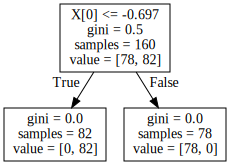

In [ ]:
graphviz.Source(tree.export_graphviz(clf))

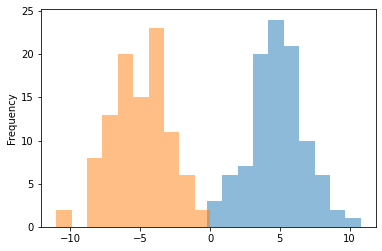

In [ ]:
is_zero = df.target == 0
is_one = df.target == 1
df[is_zero].feature.plot.hist(alpha = 0.5)
df[is_one].feature.plot.hist(alpha = 0.5)

In [ ]:
max(df[is_one].feature)

0.019053764028044817

In [ ]:
min(df[is_zero].feature)

-0.20758644282729577

*Obtain the threshold value for the feature in the first split. How does this value compare to the empirical distribution of the feature?*


The threshold value for for the feature in the first split is -0.697. As we can observe from the plot above, the two distributions meet and overlap a bit at around 0 on the x axis. The maximum value for the first distribution is 0.019 and the minimum value for the other distribution is -0.2076. The threshold is pretty close to this area of overlap, hence quite representative of the empirical distribution. 